In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
import torchvision.transforms as T
from loader import get_dataloaders

# make dataloaders
TARGET_SIZE = 128


class Expand:
    def __call__(self, input_tensor):
        shapes_new = list(input_tensor.size())
        mx = max(shapes_new)
        max_size = [3, mx, mx]
        for i in range(3):
            if max_size[i] > shapes_new[i]:
                shapes_new[i] = max_size[i] - input_tensor.shape[i]
                dop_torch = torch.ones(shapes_new)
                input_tensor = torch.cat((input_tensor, dop_torch), i)
        return input_tensor


transform = T.Compose([T.ToTensor(), Expand(), T.Resize((TARGET_SIZE, TARGET_SIZE))])
train_loader, val_loader = get_dataloaders('../data', train_transform=transform, test_transform=transform, transform_name=f'Expand({TARGET_SIZE}, {TARGET_SIZE})')

# show dataset size
TRAIN_SIZE = len(train_loader.dataset)
VAL_SIZE = len(val_loader.dataset)
print(f'Train size: {TRAIN_SIZE}. Val size: {VAL_SIZE}. Val ratio: {VAL_SIZE / (TRAIN_SIZE + VAL_SIZE) * 100:.2f}%')
first_train_batch = next(iter(train_loader))

Train size: 6777. Val size: 2261. Val ratio: 25.02%


In [4]:
first_train_batch[1]

tensor([1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0, 0, 2, 0, 1,
        2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 1,
        0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2])

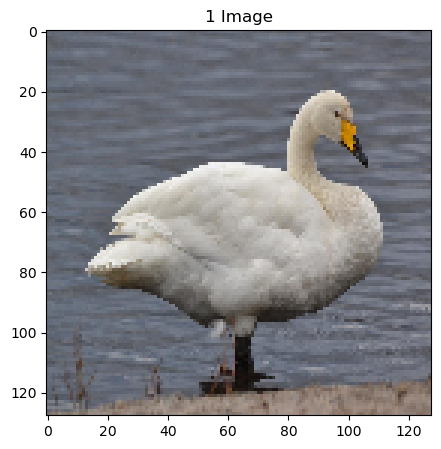

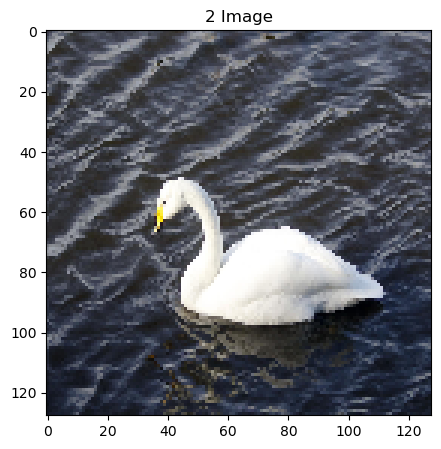

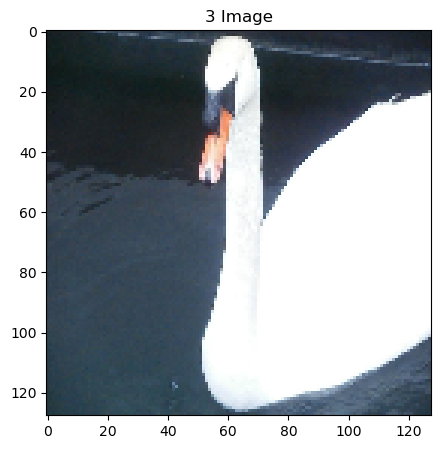

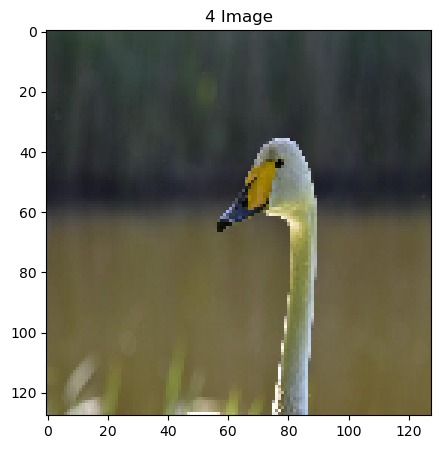

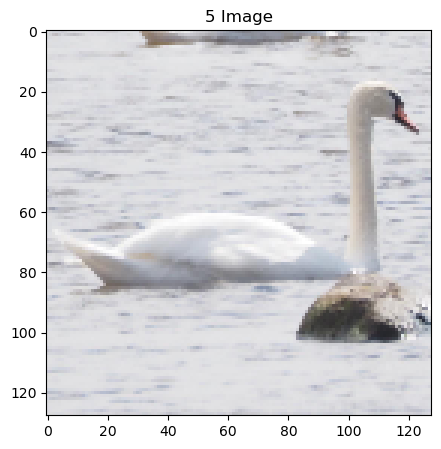

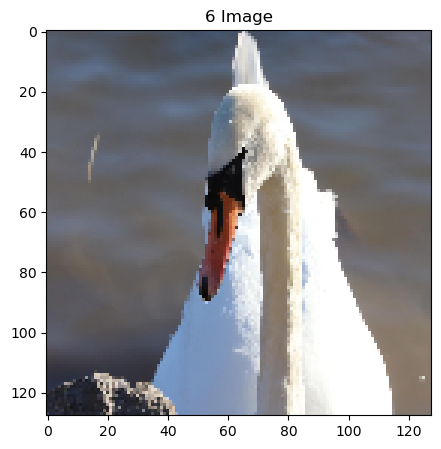

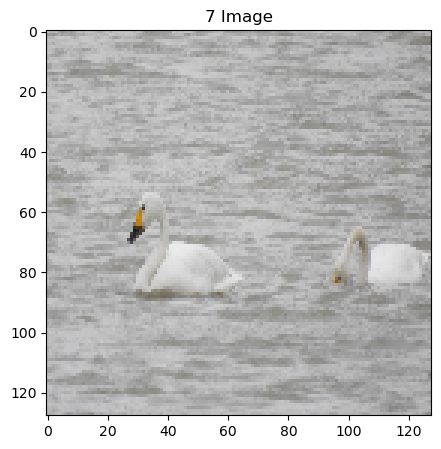

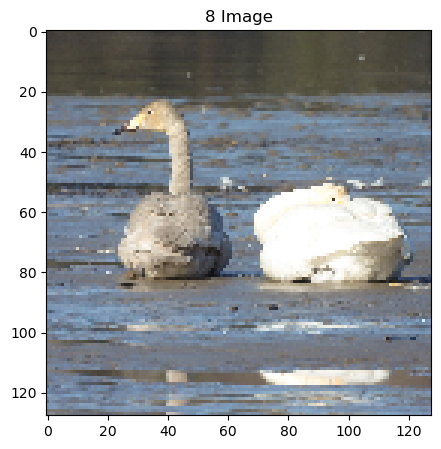

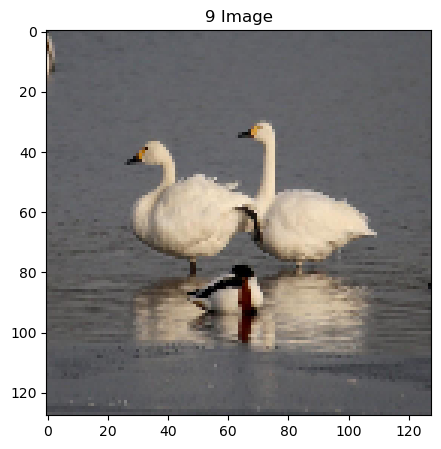

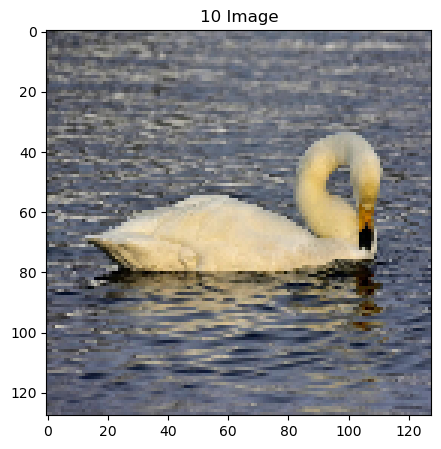

In [5]:
import matplotlib.pyplot as plt

for i in range(10):
    FIG_HEIGHT = 5
    fig_size = first_train_batch[0][0].size()
    fig_width_ratio = fig_size[1] / fig_size[0]
    plt.figure(figsize=(FIG_HEIGHT * fig_width_ratio, FIG_HEIGHT))
    plt.imshow(T.ToPILImage()(first_train_batch[0][i]))
    plt.title(f'{i + 1} Image')
    plt.show()